# Paper Figures

In [1]:
from iwander import *
%matplotlib nbagg

## Global definitions

In [2]:
BASE_DIR="../"
BD=BASE_DIR+"scratch/"
FIG_DIR="figures/"
WANDERER="Oumuamua"
from matplotlib.backends.backend_pdf import PdfPages

## Load Databases

In [3]:
astrorv=pd.read_csv(BASE_DIR+"db/src/AstroRV.csv")

/home/iwander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Load results

In [275]:
wobjs=pd.read_csv(BD+"wanderer-%s.csv"%WANDERER)
nominal=wobjs.iloc[0]
exec(open(BD+"ingress-%s.dat"%WANDERER).read())

## Figures

### Figure radiant

<IPython.core.display.Javascript object>


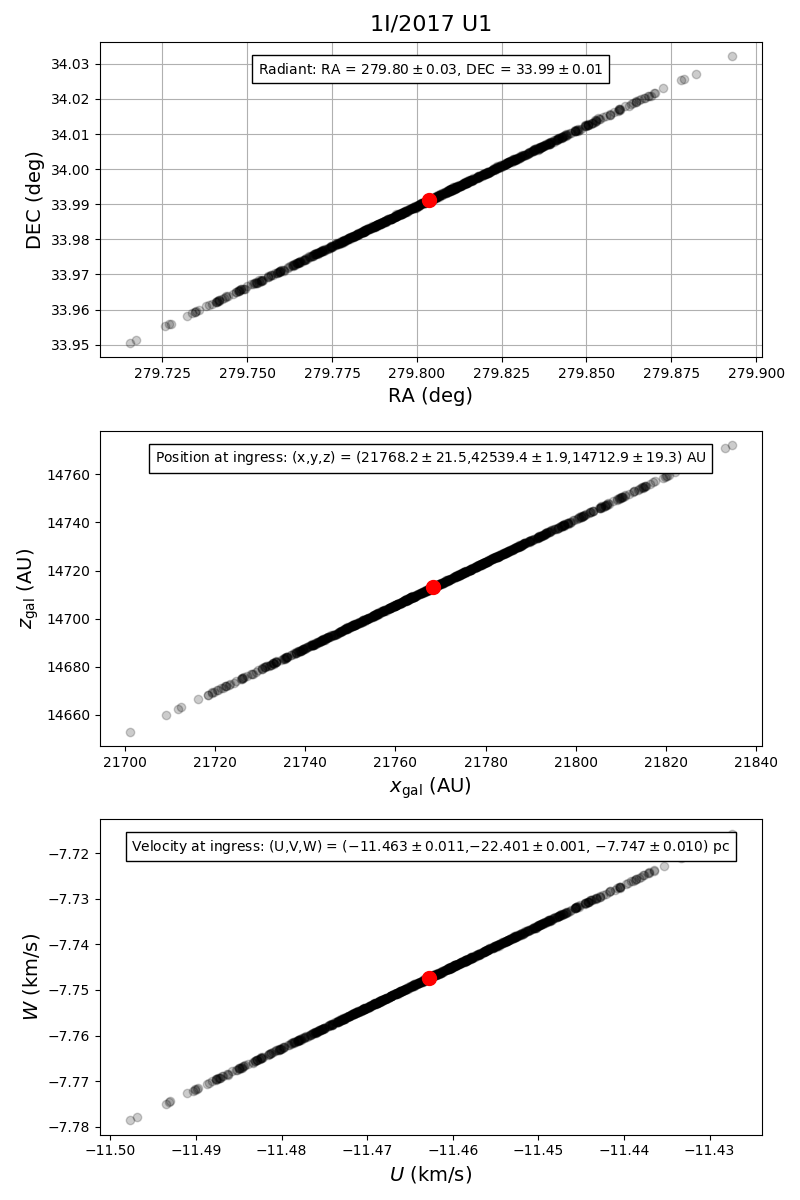

DEC =  33.9908749324 0.0131720987611
RA =  279.8030304 0.0286541901224
b =  17.113656944 0.0172479338254
l =  62.8999074443 0.0219594755915


In [4]:
#fig,axs=subPlots([1,1,1],dh=0.05,figsize=(8,4))
fig,axs=plt.subplots(3,1,figsize=(8,4*3))

dec_error=wobjs.DEC.std()
ra_error=wobjs.RA.std()
dec_mean=wobjs.DEC.mean()
ra_mean=wobjs.RA.mean()

b_error=wobjs.b.std()
l_error=wobjs.l.std()
b_mean=wobjs.b.mean()
l_mean=wobjs.l.mean()

print("DEC = ",dec_mean,dec_error)
print("RA = ",ra_mean,ra_error)

print("b = ",b_mean,b_error)
print("l = ",l_mean,l_error)

ax=axs[0]
ax.plot(wobjs.RA,wobjs.DEC,'ko',alpha=0.2)
ax.plot(wobjs.RA[0],wobjs.DEC[0],'ro',ms=10)

ax.set_xlabel("RA (deg)",fontsize=14)
ax.set_ylabel("DEC (deg)",fontsize=14)

ax.text(0.5,0.90,r"Radiant: RA = $%.2f\pm%.2f$, DEC = $%.2f\pm%.2f$"%(wobjs.RA[0],ra_error,
                                                                       wobjs.DEC[0],dec_error),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

ax.set_title('1I/2017 U1',position=(0.5,1.01),fontsize=16)
ax.grid()

ax=axs[1]
xecl=wobjs.xgal/AU;yecl=wobjs.ygal/AU;zecl=wobjs.zgal/AU;
dx=xecl.std();dy=yecl.std();dz=zecl.std();

ax.plot(xecl,zecl,'ko',alpha=0.2)
ax.plot(xecl[0],zecl[0],'ro',ms=10)
ax.set_xlabel(r'$x_{\rm gal}$ (AU)',fontsize=14)
ax.set_ylabel(r'$z_{\rm gal}$ (AU)',fontsize=14)

ax.text(0.5,0.90,r"Position at ingress: (x,y,z) = ($%.1f\pm%.1f$,$%.1f\pm%.1f$,$%.1f\pm%.1f$) AU"%(xecl[0],dx,yecl[0],dy,zecl[0],dz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

ax=axs[2]
vx=wobjs.vxgal;vy=wobjs.vygal;vz=wobjs.vzgal;
dvx=vx.std();dvy=vy.std();dvz=vz.std();


ax.plot(vx,vz,'ko',alpha=0.2)
ax.plot(vx[0],vz[0],'ro',ms=10)
ax.set_xlabel(r'$U$ (km/s)',fontsize=14)
ax.set_ylabel(r'$W$ (km/s)',fontsize=14)

ax.text(0.5,0.90,r"Velocity at ingress: (U,V,W) = ($%.3f\pm%.3f$,$%.3f\pm%.3f$, $%.3f\pm%.3f$) pc"%(vx[0],dvx,vy[0],dvy,vz[0],dvz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

fig.tight_layout()
fig.savefig(FIG_DIR+"wanderer-radiant-position.png")


In [6]:
# Calculate distances of the surrogate objects to the center of the cloud
center=np.array([wobjs.xgal.mean(),wobjs.ygal.mean(),wobjs.zgal.mean()])
ds=np.array([np.linalg.norm([wobjs.loc[ind].xgal-center[0],wobjs.loc[ind].ygal-center[1],wobjs.loc[ind].zgal-center[2]]) for ind in wobjs.index])

# Calculate relative velocities of surrogate objects to the center of the cloud
vcenter=np.array([wobjs.vxgal.mean(),wobjs.vygal.mean(),wobjs.vzgal.mean()])
vs=np.array([np.linalg.norm([wobjs.loc[ind].vxgal-vcenter[0],wobjs.loc[ind].vygal-vcenter[1],wobjs.loc[ind].vzgal-vcenter[2]]) for ind in wobjs.index])

In [10]:
# Calculate cloud expansion velocity
r90=np.percentile(ds,[90])[0]
v90=np.percentile(vs,[90])[0]

#Size properties
print("Cloud radius (r90) = ",r90/AU)
print("Cloud diameter (2*r90) = ",2*r90/AU)
print("Velocity radius (v90) = ",v90)
print("Expansion velocity (2*v90) = ",2*v90)

expansion_vel=2*v90
print("Expansion velocity = ",expansion_vel,2*r90/(t_ing*YEAR))
tret=2*PARSEC/expansion_vel/YEAR/1e6
print("Maximum retrospection time (Myrs) = ",tret)

#Velocity properties


Cloud radius (r90) =  48.9694661063
Cloud diameter (2*r90) =  97.9389322126
Velocity radius (v90) =  0.0257920067683
Expansion velocity (2*v90) =  0.0515840135366
Expansion velocity =  0.0515840135366 0.05162144835
Maximum retrospection time (Myrs) =  37.9112082228


## Thesholds

In [58]:
data=np.loadtxt(BD+"thresholds-Oumuamua.csv")

<IPython.core.display.Javascript object>


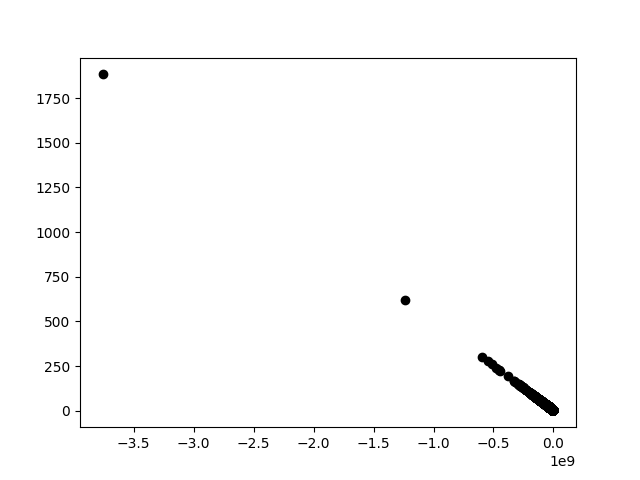

In [63]:
fig,axs=plt.subplots(1,1)
axs.plot(data[:,0],data[:,2],'ko')

## Stitching progenitors files

In [4]:
candidates=pd.read_csv(BD+"candidates-Oumuamua.csv")
len(candidates)

86398

In [5]:
datap=[]
for p in sorted(glob.glob(BD+"all/run*/progenitors-Oumuamua.csv.*")):
    data=pd.read_csv(p)
    datap+=[data]

In [6]:
enes=[]
for p in datap:
    p.dropna(subset=["source_id"], how="any", inplace=True)
    enes+=p[p.Pvelmed>0].source_id.values.tolist()

In [7]:
enes=np.unique(enes)
len(enes)

68421

In [8]:
#Save lacking candidates
lacking=candidates[~candidates.source_id.isin(enes)]
lacking.to_csv(BD+"candidates-Oumuamua.csv.lacking",index=False)
len(lacking)

18374

In [15]:
astrorv[astrorv.hip==31067].parallax_error

296183   NaN
Name: parallax_error, dtype: float64

## Check candidates criteria

In [276]:
cand=pd.read_csv(BD+"candidates-%s.csv.all"%WANDERER)
prog=pd.read_csv(BD+"progenitors-%s.csv.all"%WANDERER)

/home/iwander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/iwander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
prog.columns

Index(['Pprob', 'Psurmed', 'Pvelmed', 'Pdist', 'nomtmin', 'nomdmin', 'nomvrel',
       'tminl', 'tminmed', 'tminu', 'dminl', 'dminmed', 'dminu', 'vrell',
       'vrelmed', 'vrelu', 'n', 'postarx', 'postary', 'postarz', 'velstarx',
       'velstary', 'velstarz', 'd', 'dmin', 'tmin', 'vrelx', 'vrely', 'vrelz',
       'vrel', 'id', 'source_astro', 'source_id', 'hip', 'tycho2_id', 'ra',
       'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr',
       'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr',
       'pmra_pmdec_corr', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'l', 'b', 'ecl_lon', 'ecl_lat', 'Vmag',
       'HenryDraperId', 'name_simbad', 'sptype_simbad', 'RV_simbad',
       'Vmag_simbad', 'Hpmag_hip', 'e_Hpmag_hip', 'B_V_hip', 'e_B_V_hip',
       'V_I_hip', 'RV', 'e_R

In [261]:
pnonz=prog[(prog.dmin>0)&(prog.nomdmin>0)&(prog.nomtmin<=0)]
print("Total progenitors computed:",len(prog))
print("Total with non-zero distances and negative times:",len(pnonzero))
dmin_max=pnonz.dmin.max()
dmin_min=pnonz.dmin.min()
print("Minimum distance:",dmin_min)
print("Maximum distance:",dmin_max)

#Actual candidates
pcand=pnonz[pnonz.nomdmin<10]
print("Total candidates:",len(pcand))

Total progenitors computed: 84520
Total with non-zero distances and negative times: 83980
Minimum distance: 0.143343025372
Maximum distance: 8355.61211766
Total candidates: 1592


<IPython.core.display.Javascript object>


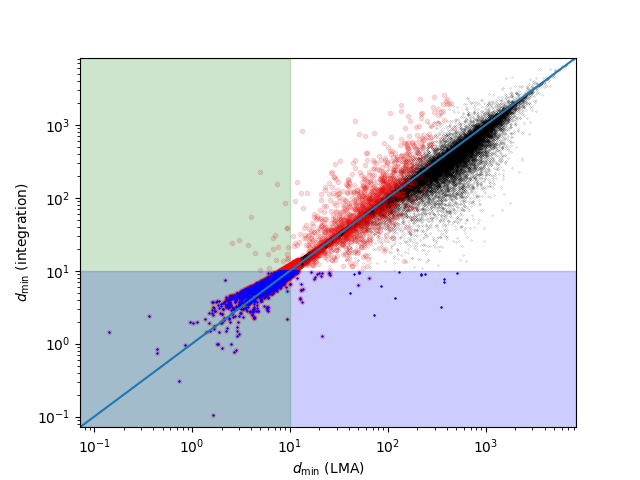

(0.071671512686085292, 8355.6121176623383)

In [265]:
fig,axs=plt.subplots(1,1)

#Plot
axs.plot(pnonz.dmin,pnonz.nomdmin,'ko',ms=0.1)
axs.plot(psel.dmin,psel.nomdmin,'ro',ms=3,mfc='None',alpha=0.2)
axs.plot(pcand.dmin,pcand.nomdmin,'b+',ms=1,mfc='None')

#Reference plot
xs=np.linspace(1e-2,dmin_max)
axs.plot(xs,xs)

#Selection area
dmax=10
axs.axhspan(1e-2,dmax,color='b',alpha=0.2)
axs.axvspan(1e-2,dmax,color='g',alpha=0.2)

#Decoration
axs.set_xlabel(r"$d_{\rm min}$ (LMA)")
axs.set_ylabel(r"$d_{\rm min}$ (integration)")

dmax=dmin_max
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlim((0.5*dmin_min,dmin_max))
axs.set_ylim((0.5*dmin_min,dmin_max))

In [266]:
#Operations betwwn columns
comp=pd.DataFrame(index=pnonz.index)
comp["dfra"]=(pnonz.d/5)
comp["dmax"]=10
comp["dexp"]=2*(1+10*np.abs(pnonz.tmin)/4e7)
dcrit=comp[["dfra","dmax"]].max(axis=1)

#Simple criterion
psel=pnonz[pnonz.dmin<10]

#Advanced criterion
psel=pnonz[pnonz.dmin<dcrit]

#Advanced criterion
psel=pnonz[pnonz.dmin<dcrit]

print("Selected:",len(psel))

Selected: 3150


<IPython.core.display.Javascript object>


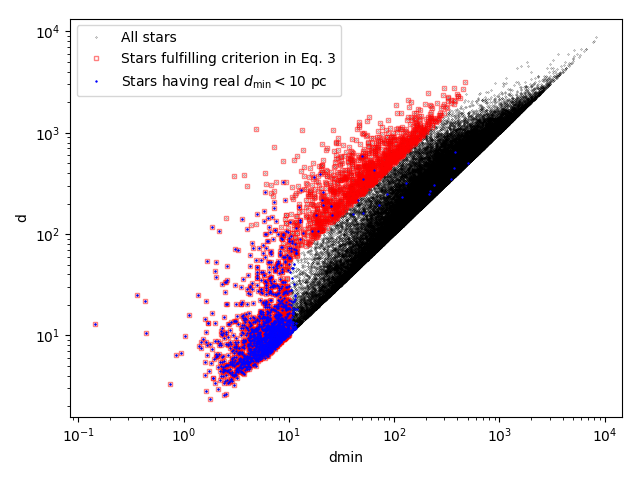

In [274]:
fig,axs=plt.subplots(1,1)

x="dmin"
y="d"

#Plot
axs.plot(np.abs(pnonz[x]),np.abs(pnonz[y]),'ko',ms=0.2,label=r'All stars')
axs.plot(np.abs(psel[x]),np.abs(psel[y]),'rs',ms=3,mfc='None',alpha=0.5,label=r'Stars fulfilling criterion in Eq. 3')
axs.plot(np.abs(pcand[x]),np.abs(pcand[y]),'b+',ms=1,mfc='None',alpha=1,label=r'Stars having real $d_{\rm min}<10$ pc')

#axs.axvspan(1e-1,10,alpha=0.2)
axs.legend()

#Decoration
axs.set_xlabel("%s"%x)
axs.set_ylabel("%s"%y)

axs.set_xscale("log")
axs.set_yscale("log")

fig.tight_layout()
fig.savefig(BD+"candidates-criterion-%s.png"%WANDERER)

<IPython.core.display.Javascript object>


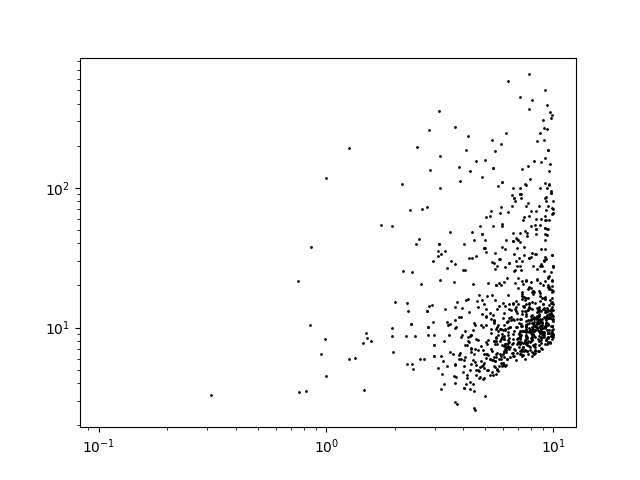

In [115]:
fig,axs=plt.subplots(1,1)



#Plot
axs.plot(pcand.nomdmin,pcand.d,'ko',ms=1)

dmax=dmin_max
axs.set_xscale("log")
axs.set_yscale("log")
#axs.set_xlim((0.5*dmin_min,dmin_max))
#axs.set_ylim((0.5*dmin_min,dmin_max))

## Generate scatter plot of the surrogate objects and nominal star